<a href="https://colab.research.google.com/github/ahmed-hesham1221/CV-Project-QR-/blob/main/Final_Final_Late.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install --upgrade reedsolo
import reedsolo as rs
from reedsolo import RSCodec, ReedSolomonError
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d
from enum import Enum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/CV_Project/Test_Cases'
file_list = sorted(os.listdir(folder_path))
images = []
for filename in file_list:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path  , cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)


In [ ]:
def dis(img, title='The_IMG', figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

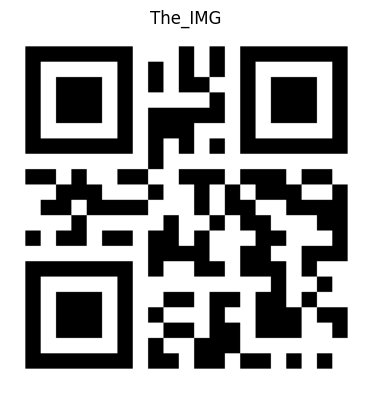

(1012, 1012)
ECL = [1 1]
MASK = [0 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 1, 0, 0] = 12 data symbols, each consisting of 8 bits
Data in message = "01-Good job!"


In [ ]:
def main_img(img):
  img=images[0]
  dis(img)
  return img

img=images[0]
img=main_img(img)
print(img.shape)

analyze_qr_structure(img)

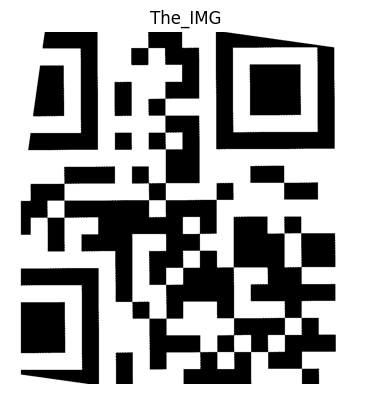

(972, 972)


IndexError: index 8 is out of bounds for axis 1 with size 0

In [ ]:

def swr(img):
      # Get the center of the image
      center = (img.shape[1] // 2, img.shape[0] // 2)
      angle = 8 # Angle to rotate
      # Perform the rotation
      rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
      rotated_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]), borderValue=(255, 255, 255))


      _, resized_binary = cv2.threshold(rotated_image, 128, 255, cv2.THRESH_BINARY)


      top_crop = 0
      bottom_crop = 40
      left_crop = 0
      right_crop = 100

        # Perform cropping
      cropped_img = resized_binary[top_crop:-bottom_crop, left_crop:-right_crop]
      #

       # Make the image square
      height, width = cropped_img.shape
      if width > height:
          pad_top = (width - height) // 2
          pad_bottom = width - height - pad_top
          squared_img = np.pad(cropped_img, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=255)
      else:
          pad_left = (height - width) // 2
          pad_right = height - width - pad_left
          squared_img = np.pad(cropped_img, ((0, 0), (pad_left, pad_right)), mode='constant', constant_values=255)

      # resized_image = cv2.resize(squared_img, (21, 21), interpolation=cv2.INTER_NEAREST)
      img =  squared_img




      dis(img)
      return img
img=images[1]
img=swr(img)
print(img.shape)

analyze_qr_structure(img)

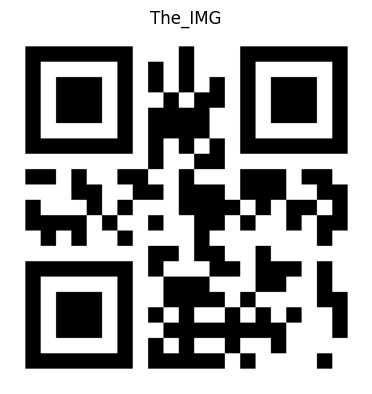

(1012, 1012)
ECL = [1 1]
MASK = [0 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 0, 0, 0, 0] = 16 data symbols, each consisting of 8 bits
Data in message = "LeffyBinaYaDonya"


In [ ]:
def flip_img(img):
  # Flip the image vertically (upside down)
  flipped_vertically = cv2.flip(img, 0)

  # Flip the image horizontally
  flipped_both = cv2.flip(flipped_vertically, 1)
  img = flipped_both
  dis(img)
  return img

img=images[2]
img=flip_img(img)
print(img.shape)

analyze_qr_structure(img)

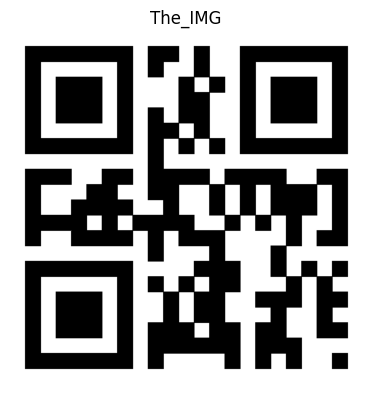

(1012, 1012)
ECL = [1 1]
MASK = [1 0 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits
Data in message = "Black mirror hehe"


In [ ]:
def BLack_M(img):
  # Flip the image horizontally
  gray = cv2.flip(img, 1)
  # Create a mask for gray pixels
  threshold = 0
  mask = gray <= threshold
  # Set gray pixels to white
  gray[mask] = 255
  # Dilate and erode to enhance image
  kernel = np.ones((5, 5), np.uint8)
  dilated_image = cv2.dilate(gray, kernel, iterations=3)
  eroded_image = cv2.erode(dilated_image, kernel, iterations=3)
  enhanced_image = cv2.convertScaleAbs(eroded_image)
  # Prepare final image for analysis
  img = enhanced_image
  dis(img)
  return img



img=images[3]
img=BLack_M(img)
print(img.shape)

analyze_qr_structure(img)

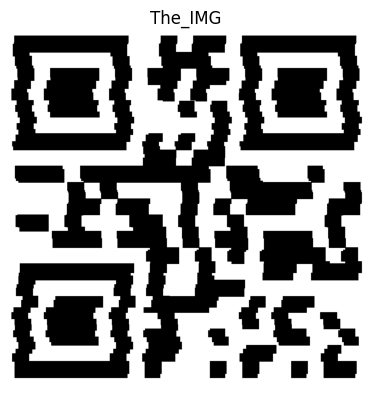

(1012, 1012)
ECL = [1 1]
MASK = [1 0 1]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits
Data in message = "|rxwx1eh2"


In [ ]:
def remove_haze(hazy_image, kernel_size=(7, 7), iterations=5):
    equalized_image = cv2.equalizeHist(hazy_image)
    # Apply binary thresholding
    threshold_value = 150
    binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
    # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
    kernel_size = 9
    median_filtered = cv2.medianBlur(binary_image, kernel_size)
    # Optional: Apply morphological operations (e.g., closing) to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    square_size = 14
    # Define the kernel for dilation
    dilation_kernel = np.ones((square_size, square_size), np.uint8)
    # Apply morphological dilation to make the black squares more square-shaped
    dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
    # Apply erosion with a 15x15 pixel square filter
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)
    dis(eroded_img)
    return eroded_img


img=images[4]
img=remove_haze(img)
print(img.shape)

analyze_qr_structure(img)

Found 3 potential locator squares.


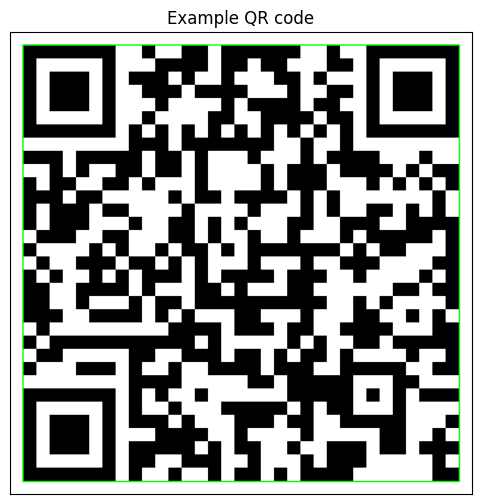

In [ ]:



img=images[15]
def find_qr_locator_squares(image):
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Apply a simple binary threshold
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if hierarchy is None:
        return []

    hierarchy = hierarchy[0]
    locator_squares = []

    for idx, contour in enumerate(contours):
        # Check if the contour has a child (it is a parent)
        child_idx = hierarchy[idx][2]
        if child_idx != -1:
            # Check if the child has a child (it is a grandparent)
            grandchild_idx = hierarchy[child_idx][2]
            if grandchild_idx != -1:
                peri = cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

                if len(approx) == 4:  # Contour has 4 vertices, potentially a square
                    (x, y, w, h) = cv2.boundingRect(approx)
                    aspect_ratio = w / float(h)
                    if 0.9 <= aspect_ratio <= 1.1:  # Aspect ratio check for squareness
                        if 100 < w < 800:  # Adjust size check for smaller 21x21 QR codes
                            locator_squares.append((x, y, w, h))

    return locator_squares

def draw_bounding_square(image, locator_squares):
    if len(locator_squares) < 3:
        print("Less than 3 locator squares found")
        return image

    # Sort the locator squares by their positions
    locator_squares = sorted(locator_squares, key=lambda s: (s[1], s[0]))

    # Consider only the three main locator squares
    top_left = locator_squares[0]
    bottom_left = locator_squares[1]
    top_right = locator_squares[2]

    # Find the outermost coordinates
    min_x = min(top_left[0], bottom_left[0], top_right[0])
    min_y = min(top_left[1], bottom_left[1], top_right[1])
    max_x = max(top_left[0] + top_left[2], bottom_left[0] + bottom_left[2], top_right[0] + top_right[2])
    max_y = max(top_left[1] + top_left[3], bottom_left[1] + bottom_left[3], top_right[1] + top_right[3])

    # Draw the bounding rectangle around the three main locator squares
    cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)

    return image

# img=images[0]


locator_squares = find_qr_locator_squares(img)
print("Found {} potential locator squares.".format(len(locator_squares)))

# Convert grayscale image to BGR for color display
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes around each detected locator square
bounded_img = draw_bounding_square(img_bgr, locator_squares)

# Display the result
fig = plt.figure(figsize=(6, 6))
plt.xticks([], [])
plt.yticks([], [])
plt.title('Example QR code')
plt.imshow(cv2.cvtColor(bounded_img, cv2.COLOR_BGR2RGB))
plt.show()

# # Draw bounding square (already drawn in img_bgr)
# fig = plt.figure(figsize=(8, 8))
# plt.imshow(cv2.cvtColor(bounded_img, cv2.COLOR_BGR2RGB))
# plt.title('QR Code with Bounding Square')
# plt.axis('off')
# plt.show()


Images loaded successfully.


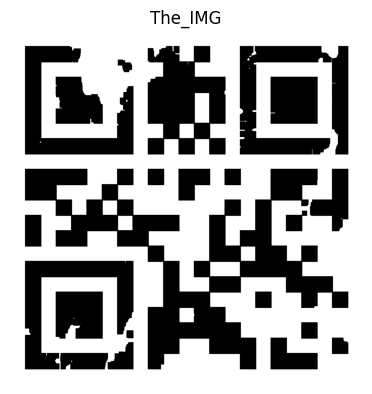

(1012, 1012)
ECL = [1 1]
MASK = [1 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits
Data in message = "compressoespresso"


In [ ]:
def compresso(img):
    if img is None:
        print("Error: Unable to read images.")
    else:
        print("Images loaded successfully.")

        # Check the image data type
        if img.dtype != np.uint8:
        # Convert the image to 8-bit grayscale
          img = cv2.convertScaleAbs(img)

        equalized_image = cv2.equalizeHist(img)
        # Apply binary thresholding
        threshold_value = 150
        binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
        # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
        kernel_size = 7
        median_filtered = cv2.medianBlur(binary_image, kernel_size)
        # Optional: Apply morphological operations (e.g., closing) to remove noise
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
        square_size = 12
        # Define the kernel for dilation
        dilation_kernel = np.ones((square_size, square_size), np.uint8)
        # Apply morphological dilation to make the black squares more square-shaped
        dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
        # Apply erosion with a 15x15 pixel square filter
        erosion_kernel = np.ones((15, 15), np.uint8)
        eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)
        dis(eroded_img)
        return eroded_img

img=images[7]
img=compresso(img)
print(img.shape)


analyze_qr_structure(img)


Images loaded successfully.


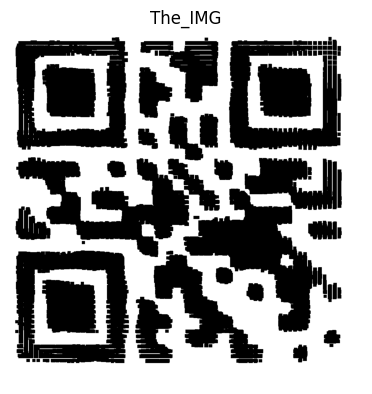

(1012, 1012)


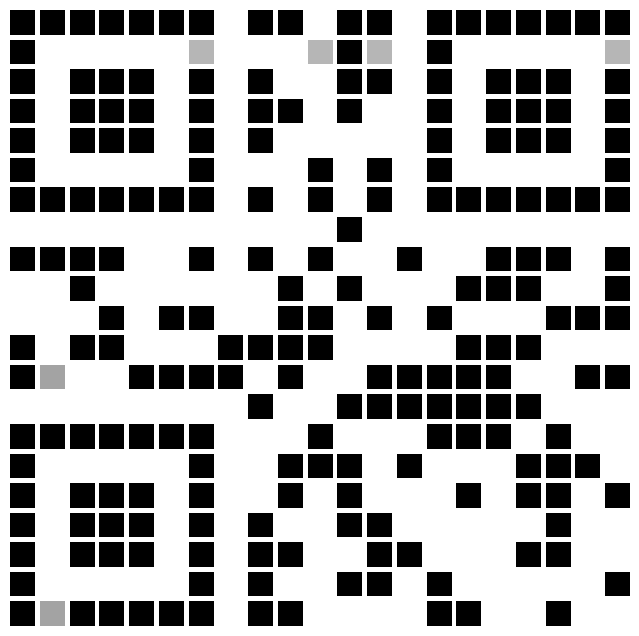

ECL = [1 1]
MASK = [1 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits
0000 (=END) -- the NULL TERMINATOR, followed by padding and/or ECC
This codec can correct up to 3 errors and 7 erasures independently
Data in message = "mobiley we23 ð"


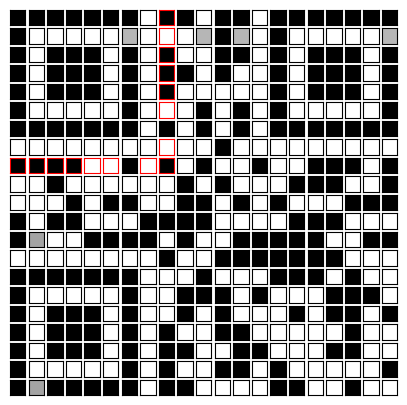

In [ ]:
def rm_blur(img):
    if img is None:
        print("Error: Unable to read images.")
    else:
        print("Images loaded successfully.")

    def motion_kernel(angle, length):
        """Creates a motion blur kernel."""
        kernel = np.zeros((length, length))
        kernel[int((length - 1) / 2), :] = np.ones(length)
        M = cv2.getRotationMatrix2D((length // 2, length // 2), angle, 1)
        kernel = cv2.warpAffine(kernel, M, (length, length))
        kernel /= np.sum(kernel)
        return kernel

    def wiener_deconvolution(image, psf, noise_var):
        """Performs Wiener deconvolution."""
        image_dft = np.fft.fft2(image)
        psf_dft = np.fft.fft2(psf, s=image.shape)
        psf_dft_conj = np.conj(psf_dft)
        psf_dft_mag_squared = np.abs(psf_dft) ** 2
        wiener_filter = psf_dft_conj / (psf_dft_mag_squared + noise_var)
        restored_dft = image_dft * wiener_filter
        restored_image = np.fft.ifft2(restored_dft)
        return np.abs(restored_image)

    # Define the angle and length of the motion blur
    angle = 315  # Adjust the angle as needed (in degrees)
    length = 20  # Adjust the length of the motion blur as needed

    # Create the motion blur kernel
    psf = motion_kernel(angle, length)

    # Define the noise variance (adjust as needed)
    noise_variance = 1e-4

    # Perform Wiener deconvolution
    restored_image = wiener_deconvolution(img, psf, noise_variance)

    # Convert the image to an 8-bit unsigned integer depth
    restored_image = cv2.convertScaleAbs(restored_image)

    # Apply a threshold to the gradient image to create a binary image
    threshold_value = 150
    binary_image = np.array(cv2.threshold(restored_image, threshold_value, 255, cv2.THRESH_BINARY)[1], dtype="uint8")


    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    kernel_size2 = (12,12)  # You can adjust the kernel size as needed
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size2)
    eroded_image = cv2.erode(closed_image,kernel2, iterations=1)


    kernel_size3 = (1,1)  # You can adjust the kernel size as needed
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size3)
    dilated_image = cv2.dilate(closed_image,kernel3, iterations=1)
    img=dilated_image
    dis(img)
    return img


img=images[8]
img=rm_blur(img)
print(img.shape)


analyze_qr_structure2(img)

Images loaded successfully.


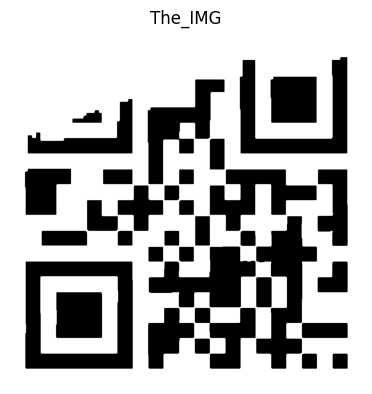

(1012, 1012)
ECL = [1 1]
MASK = [1 0 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 1, 1, 1] = 15 data symbols, each consisting of 8 bits
Data in message = "GoneWithTheWind"


In [ ]:
def Gone(img):
    if img is None:
        print("Error: Unable to read images.")
    else:
        print("Images loaded successfully.")

        # Check the image data type
        if img.dtype != np.uint8:
        # Convert the image to 8-bit grayscale
          img = cv2.convertScaleAbs(img)

        equalized_image = cv2.equalizeHist(img)
        # Apply binary thresholding
        threshold_value = 150
        binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
        # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
        kernel_size = 7
        median_filtered = cv2.medianBlur(binary_image, kernel_size)
        # Optional: Apply morphological operations (e.g., closing) to remove noise
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
        square_size = 12
        # Define the kernel for dilation
        dilation_kernel = np.ones((square_size, square_size), np.uint8)
        # Apply morphological dilation to make the black squares more square-shaped
        dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
        # Apply erosion with a 15x15 pixel square filter
        erosion_kernel = np.ones((10, 10), np.uint8)
        eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)
        avg_filtered_img = cv2.blur(eroded_img, (5, 5))

        _, binary = cv2.threshold(avg_filtered_img, 145, 255, cv2.THRESH_BINARY)
        # eroded_img = cv2.resize(binary_roi, (21, 21) , cv2.INTER_NEAREST_EXACT)
        img= binary
        dis(img)
        return img



img=images[9]
img=Gone(img)
print(img.shape)

analyze_qr_structure(img)

<ipython-input-186-119a7cb92921>:14: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt((i - rows/2)*2 + (j - cols/2)*2)


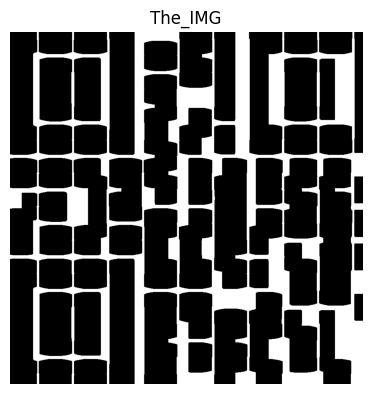

(932, 932)
ECL = [1 1]
MASK = [1 1 1]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits
Data in message = "waaaaaves"


In [ ]:
def remove_sin_gradient(img):
  # Apply Fourier Transform
  f_transform = np.fft.fft2(img)
  f_transform_shifted = np.fft.fftshift(f_transform)
  # Identify the frequency corresponding to the sinusoidal noise
  frequency = (11 / img.shape[1])*1.5  # Assuming the noise has 11 complete cycles

  # Create a filter mask
  filter_mask = np.ones_like(f_transform_shifted)
  rows, cols = filter_mask.shape
  for i in range(rows):
      for j in range(cols):
          # Calculate the distance from the center
           dist = np.sqrt((i - rows/2)*2 + (j - cols/2)*2)
           # If the frequency is within a certain range, set the mask value to 0
           if abs(dist - frequency * rows) < 1:  # Adjust the range as needed
              filter_mask[i, j] = 0

    # Apply the filter mask
  filtered_transform = f_transform_shifted * filter_mask

   # Perform inverse Fourier Transform
  filtered_img = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_transform)))
    # Apply thresholding
  _, thresh_img = cv2.threshold(filtered_img, 89, 255, cv2.THRESH_BINARY)
    # Perform dilation operation
  dilation_size = 1  # Change this value as needed
  kernel_dilation = np.ones((dilation_size, dilation_size), np.uint8)
  dilated_img = cv2.dilate(thresh_img, kernel_dilation, iterations=1)

    # Define the size of the rectangle for erosion
  erosion_height = 32
  erosion_width = 32
    # Create a kernel for erosion
  kernel_erosion = np.ones((erosion_height, erosion_width), np.uint8)
    # Perform erosion operation
  eroded_img = cv2.erode(dilated_img, kernel_erosion, iterations=1)
    # Define cropping dimensions
  top_crop = 40
  bottom_crop = 40
  left_crop = 40
  right_crop = 40

    # Perform cropping
  cropped_img = eroded_img[top_crop:-bottom_crop, left_crop:-right_crop]

  dis(cropped_img)
  return cv2.convertScaleAbs(cropped_img)

img=images[10]
img=remove_sin_gradient(img)
print(img.shape)

analyze_qr_structure(img)

Image size: (1012, 1012)


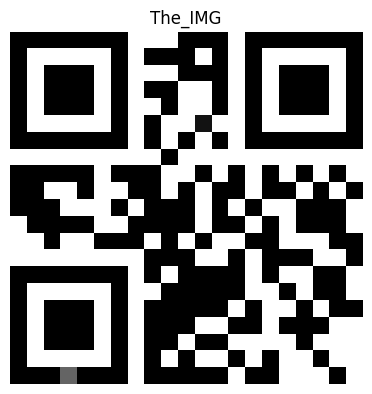

(21, 21)
ECL = [1 1]
MASK = [1 1 1]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 1, 0, 1] = 13 data symbols, each consisting of 8 bits
Data in message = "mal7 w felfel"


In [ ]:
def noices(img):
  if img is not None:
    # Output the size of the image
      print("Image size:", img.shape)
    # Apply mean filter twice
      filtered_img = cv2.blur(img, (9, 9))
      filtered_img = cv2.blur(filtered_img, (9, 9))

      # Define the size of the larger filter
      filter_size = 9
      # Apply the larger filter to perform additional averaging
      filtered_img = cv2.blur(filtered_img, (filter_size, filter_size))
      # Apply thresholding to further remove noise or enhance edges
      _, thresh_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

      # Apply morphological opening to further refine the image
      kernel = np.ones((3, 3), np.uint8)
      opening_img = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel)


      # Define the size of the square for dilation
      square_size = 12

      # Define the kernel for dilation
      dilation_kernel = np.ones((square_size, square_size), np.uint8)

      # Apply morphological dilation to make the black squares more square-shaped
      dilated_img = cv2.dilate(opening_img, dilation_kernel, iterations=1)

      # Apply erosion with a 15x15 pixel square filter
      erosion_kernel = np.ones((15, 15), np.uint8)
      eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)

      avg_filtered_img = cv2.blur(eroded_img, (5, 5))
      start_row = 50
      end_row = 962
      start_col = 50
      end_col = 962
      avg_filtered_img = avg_filtered_img[start_row:end_row, start_col:end_col]
      _, binary_roi = cv2.threshold(avg_filtered_img, 145, 255, cv2.THRESH_BINARY)
      eroded_img = cv2.resize(binary_roi, (21, 21) , cv2.INTER_NEAREST_EXACT)
      img= eroded_img
      dis(img)
      return img
  else:
    print("Error: Unable to load image.")



img=images[11]
img=noices(img)
print(img.shape)

analyze_qr_structure(img)


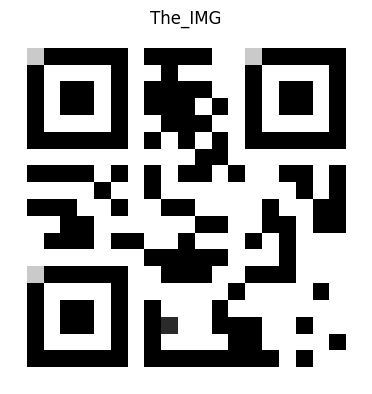

(21, 21)
ECL = [1 1]
MASK = [1 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 1, 0, 0, 0] = 24 data symbols, each consisting of 8 bits


ReedSolomonError: Too many errors to correct

In [ ]:

def replicate_top_right_square(qr_code_image):
    # Convert image to grayscale if it is not already
    # Convert image to grayscale if it is not already
    if len(qr_code_image.shape) == 3:
        qr_code_image = cv2.cvtColor(qr_code_image, cv2.COLOR_BGR2GRAY)

    # Extract the square from the source position
    src_row, src_col = src_pos
    top_right_square = qr_code_image[src_row:src_row + square_size, src_col:src_col + square_size]

    # Create a copy of the image to avoid modifying the original image
    modified_image = qr_code_image.copy()

    # Place the square into the first destination position
    dst_row1, dst_col1 = dst_pos1
    modified_image[dst_row1:dst_row1 + square_size, dst_col1:dst_col1 + square_size] = top_right_square

    # Place the square into the second destination position
    dst_row2, dst_col2 = dst_pos2
    modified_image[dst_row2:dst_row2 + square_size, dst_col2:dst_col2 + square_size] = top_right_square

    return modified_image

# Example usage:
# Define the parameters for a standard 21x21 QR code
square_size = 7
src_pos = (0, 14)       # Top-right corner
dst_pos1 = (0, 1)       # Top-left corner
dst_pos2 = (13, 1)      # Bottom-left corner


def remove_black_areas(image, threshold=150, off_white_threshold=1):
    # Check if the image is already grayscale
    if len(image.shape) == 2 or image.shape[2] == 1:
        gray = image  # Image is already grayscale
    else:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold to identify black areas
    _, thresholded = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    # Invert the thresholded image to get black areas as white
    thresholded = cv2.bitwise_not(thresholded)

    # Apply bitwise AND to keep black regions
    if len(image.shape) == 2 or image.shape[2] == 1:
        # If the input is grayscale, stack channels to create a 3-channel image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    result = cv2.bitwise_and(image, image, mask=thresholded)

    # Create a mask for off-white areas
    off_white_mask = cv2.inRange(gray, off_white_threshold, 255)

    # Set off-white areas to white (255) in the result image
    result[off_white_mask != 0] = [255, 255, 255]

    result=cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result = cv2.resize(result, (21, 21) , cv2.INTER_NEAREST_EXACT)
    result =replicate_top_right_square(result)

    dis(result)
    return result
img=images[12]
img=remove_black_areas(img)
print(img.shape)

analyze_qr_structure(img)


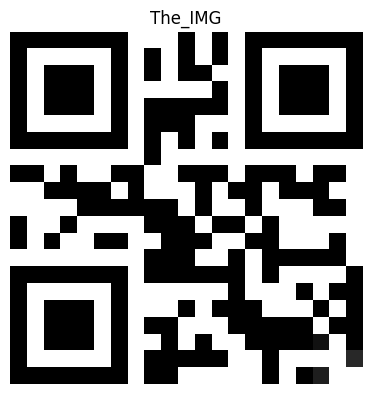

(21, 21)
ECL = [1 1]
MASK = [0 1 0]
ENC = [0, 0, 1, 0]
LEN = [0, 0, 0, 0, 0, 1, 1, 0] = 6 data symbols, each consisting of 8 bits
Data in message = "BANANAAAAAAA750TW"


In [ ]:
def Bananaa(img):
    # Check if the image was loaded successfully
    if img is not None:
        # Define the rotation angle in degrees
        angle = -20.5
        center = (img.shape[1] // 2, img.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

        # Define the crop boundaries
        top_crop = 585
        bottom_crop = 287
        left_crop = 550
        right_crop = rotated_img.shape[1]

        cropped_img = rotated_img[top_crop:rotated_img.shape[0] - bottom_crop, left_crop:right_crop]
        additional_right_crop = 325
        additional_cropped_img = cropped_img[:, :cropped_img.shape[1] - additional_right_crop]

        # Apply thresholding
        _, bw_img = cv2.threshold(additional_cropped_img, 90, 255, cv2.THRESH_BINARY)

        # Make the image square
        height, width = bw_img.shape
        if width > height:
            pad_top = (width - height) // 2
            pad_bottom = width - height - pad_top
            squared_img = np.pad(bw_img, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=255)
        else:
            pad_left = (height - width) // 2
            pad_right = height - width - pad_left
            squared_img = np.pad(bw_img, ((0, 0), (pad_left, pad_right)), mode='constant', constant_values=255)

        squared_img = cv2.resize(squared_img, (21, 21) , cv2.INTER_NEAREST_EXACT)

        img=squared_img
        dis(img)
        return img
        # Display final image size
        print("Final Image size:", squared_img.shape)
    else:
        print("Error: Unable to load image.")


img=images[13]
img=Bananaa(img)
print(img.shape)

analyze_qr_structure(img)


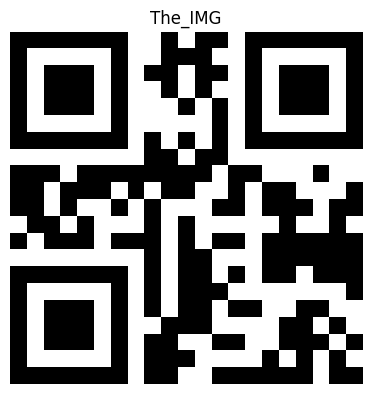

(21, 21)
ECL = [1 1]
MASK = [1 0 1]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 0, 1, 1] = 11 data symbols, each consisting of 8 bits
Data in message = "dwXQ49gcwWQ"


In [ ]:
img=images[5]
def prespective_transform( img):
  # Pixel values in original image
  red_point = [318,197]
  green_point= [973,93]
  blue_point = [718,847]
  black_point= [61,951]

  # Create point matrix
  point_matrix =[red_point,green_point,black_point, blue_point]
  point_matrix = np.float32(point_matrix)
  # Output image size
  width, height = 1012,1012

  # Desired points value in output images
  converted_red_pixel_value = [0,0]
  converted_green_pixel_value = [width,0]
  converted_black_pixel_value = [0,height]
  converted_blue_pixel_value = [width,height]

  # Convert points
  converted_points = np.float32([converted_red_pixel_value,converted_green_pixel_value,
                                converted_black_pixel_value,converted_blue_pixel_value])

  # perspective transform
  perspective_transform = cv2.getPerspectiveTransform(point_matrix,converted_points)
  img_Output = cv2.warpPerspective(img,perspective_transform,(width,height))
  img_Output = cv2.resize(img_Output , (21,21) , cv2.INTER_NEAREST_EXACT)

  dis(img_Output)
  return img_Output

img=prespective_transform(img)
print(img.shape)

analyze_qr_structure(img)

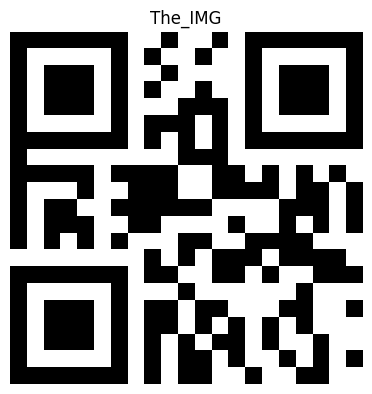

(21, 21)
ECL = [1 1]
MASK = [1 1 1]
ENC = [0, 0, 1, 0]
LEN = [0, 0, 0, 0, 1, 0, 0, 0] = 8 data symbols, each consisting of 8 bits
Data in message = "THE MIGHTY FINGER"


In [ ]:

def rm_finger(img):
    def mirror_qr_marker(img):

        marker_size=7
        # Coordinates for the bottom-left marker
        bottom_left_x = 0
        bottom_left_y = img.shape[0] - marker_size

        # Extract the bottom-left marker
        bottom_left_marker = img[bottom_left_y:bottom_left_y + marker_size,
                                bottom_left_x:bottom_left_x + marker_size]

        # Flip the marker horizontally to create a mirror effect
        mirrored_marker = cv2.flip(bottom_left_marker, 0)

        # Coordinates for the top-left marker replacement
        top_left_x = 0
        top_left_y = 0

        # Replace the top-left region with the mirrored marker
        img[top_left_y:top_left_y + marker_size,
            top_left_x:top_left_x + marker_size] = mirrored_marker

        return img



    # Convert to grayscale and apply binary threshold
    erosion_kernel = np.ones((9, 9), np.uint8)
    _, thresholded_image = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)


    # marker_size = 450 # Adjust this size based on the QR code

    # # Call the function to mirror and replace the markers
    fixed_qr_image = mirror_qr_marker(thresholded_image)
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(fixed_qr_image, erosion_kernel, iterations=1)
    # Apply average filter
    avg_filtered_img = cv2.blur(eroded_img, (5, 5))
    start_row = 55
    end_row = 958
    start_col = 55
    end_col = 958
    avg_filtered_img = thresholded_image[start_row:end_row, start_col:end_col]
    # Convert the resized ROI to binary black and white using thresholding
    _, binary_roi = cv2.threshold(avg_filtered_img, 145, 255, cv2.THRESH_BINARY)
    img= cv2.resize(binary_roi, (21, 21), cv2.INTER_NEAREST_EXACT)


    fixed_qr_image = mirror_qr_marker(img)
    def replicate_column_to_row(qr_code_image):
        # Ensure the input is a numpy array
        if not isinstance(qr_code_image, np.ndarray):
            qr_code_image = np.array(qr_code_image)

        # Define the column and row index
        col_index = 8  # 9th column (0-based index)
        row_index = 8  # 9th row (0-based index)

        # Extract the last 5 bits of the 9th column
        column_bits = qr_code_image[-5:, col_index]

        # Reverse the order of the column bits
        reversed_bits = column_bits[::-1]

        # Place the reversed bits into the first 5 bits of the 9th row
        qr_code_image[row_index, :5] = reversed_bits

        return qr_code_image

    img=replicate_column_to_row(fixed_qr_image)
    dis(img)
    return img

img=images[6]
img=rm_finger(img)
print(img.shape)

analyze_qr_structure(img)

In [ ]:
preprocess_functions = [
    swr,                   # 0
    flip_img,              # 1
    BLack_M,               # 2
    remove_haze,           # 3
    prespective_transform, # 4
    rm_finger,             # 5
    compresso,             # 6
    rm_blur,               # 7
    Gone,                  # 8
    noices,                # 9
    remove_sin_gradient,   # 10
    remove_black_areas,    # 11
    Bananaa                # 12
]

# # preprocess_functions[0](img)

# for img in images:
#   if check_qr_alignment(img):
#     continue

#   else:





In [ ]:
def is_image_alignment(image, angle_threshold=5):

    # Convert image to binary (assuming the image is already grayscale)
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Extract and adjust angles from contours
    angles = [(cv2.minAreaRect(cnt)[2] + 90) if cv2.minAreaRect(cnt)[2] < -45 else cv2.minAreaRect(cnt)[2] for cnt in contours]

    if not angles:
        return False

    # Find the most common angle
    most_common_angle = max(set(angles), key=angles.count)

    # Return True if the most common angle is approximately 90 degrees
    return abs(most_common_angle - 90) <= angle_threshold


def qr_angle(image):
    # Convert image to binary (assuming the image is already grayscale)
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Extract and adjust angles from contours
    angles = [(cv2.minAreaRect(cnt)[2] + 90) if cv2.minAreaRect(cnt)[2] < -45 else cv2.minAreaRect(cnt)[2] for cnt in contours]

    if not angles:

        return 0  # Return a default angle when no contours are found

    # Find the most common angle
    most_common_angle = max(set(angles), key=angles.count)

    return most_common_angle

def detect_skew(img, angle_threshold=5):
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is None:
        return False, 0.0

    angles = []
    for line in lines:
        rho, theta = line[0]
        angle = np.rad2deg(theta) - 90
        angles.append(angle)

    average_angle = np.mean(angles)
    is_skewed = abs(average_angle) > angle_threshold

    return is_skewed, average_angle

def get_variance(image):
    """
        TC 9    variance of 2.185901658334999
        TC 11   variance of 8.590675298131211.
        TC 10   variance of 0.19370127638300863.
        TC 13   variance of 4.678598907850705
        TC 14   variance of 81.94764.
    """
    if image is None:
        raise ValueError("")

    # Compute the Laplacian of the image and then the variance
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance_of_laplacian = laplacian.var()

    return variance_of_laplacian

def is_image_blurry(image, threshold=100.0):
    """
        Determine if the image is blurry based on the variance of the Laplacian.
    """
    variance_of_laplacian = get_variance(image)
    # Determine if the image is blurry
    is_blurry = variance_of_laplacian < threshold
    return is_blurry



Images loaded successfully.


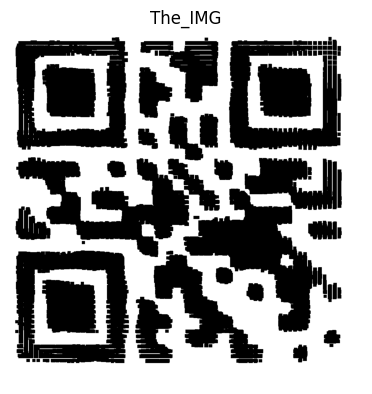

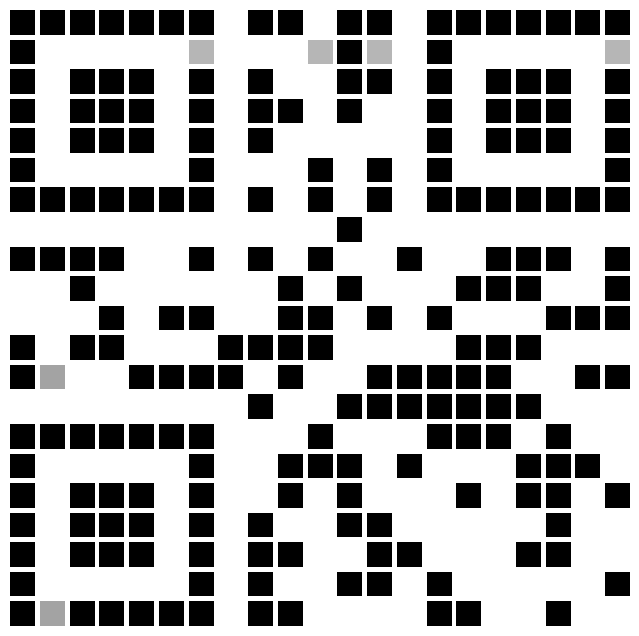

ECL = [1 1]
MASK = [1 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 0, 0, 0, 1] = 17 data symbols, each consisting of 8 bits
0000 (=END) -- the NULL TERMINATOR, followed by padding and/or ECC
This codec can correct up to 3 errors and 7 erasures independently
Data in message = "mobiley we23 ð"
Images loaded successfully.


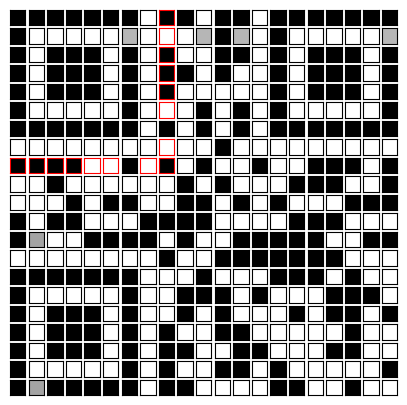

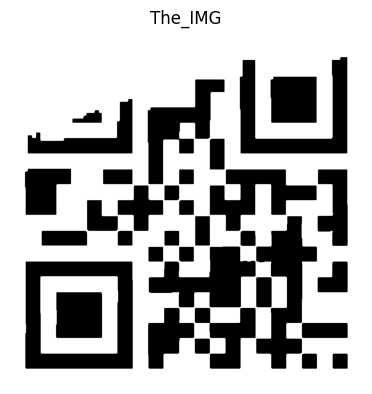

ECL = [1 1]
MASK = [1 0 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 1, 1, 1] = 15 data symbols, each consisting of 8 bits
Data in message = "GoneWithTheWind"


<ipython-input-186-119a7cb92921>:14: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt((i - rows/2)*2 + (j - cols/2)*2)


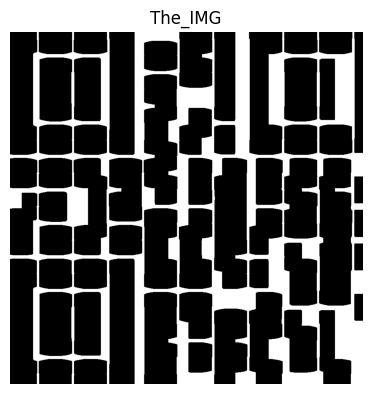

ECL = [1 1]
MASK = [1 1 1]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits
Data in message = "waaaaaves"


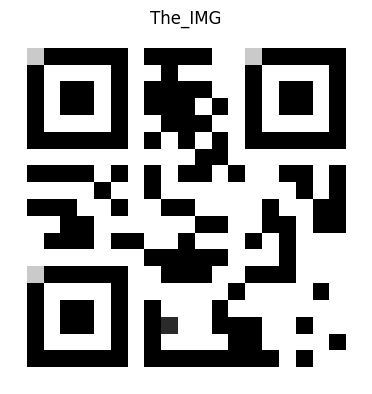

ECL = [1 1]
MASK = [1 1 0]
ENC = [0, 1, 0, 0]
LEN = [0, 0, 0, 1, 1, 0, 0, 0] = 24 data symbols, each consisting of 8 bits
Error processing image at index 12: Too many errors to correct


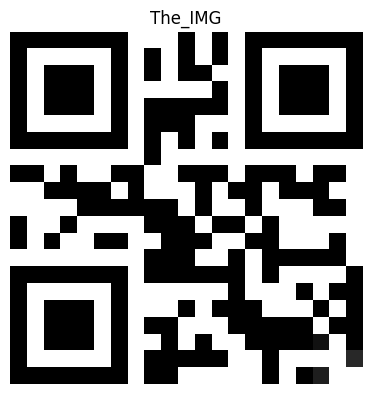

ECL = [1 1]
MASK = [0 1 0]
ENC = [0, 0, 1, 0]
LEN = [0, 0, 0, 0, 0, 1, 1, 0] = 6 data symbols, each consisting of 8 bits
Data in message = "BANANAAAAAAA750TW"


In [ ]:
function_map = {
    "main_img": main_img,
    "swr": swr,
    "flip_img": flip_img,
    "BLack_M": BLack_M,
    "remove_haze": remove_haze,
    "prespective_transform": prespective_transform,
    "rm_finger": rm_finger,
    "compresso": compresso,
    "rm_blur": rm_blur,
    "Gone": Gone,
    "noices": noices,
    "remove_sin_gradient": remove_sin_gradient,
    "remove_black_areas": remove_black_areas,
    "Bananaa": Bananaa,
    "is_image_blurry": is_image_blurry

}

preprocess_function_list = [
    (0, "main_img"),
    (1, "swr"),
    (2, "flip_img"),
    (3, "BLack_M"),
    (4, "remove_haze"),
    (5, "prespective_transform"),
    (6, "rm_finger"),
    (7, "compresso"),
    (8, "rm_blur"),
    (9, "Gone"),
    (10, "noices"),
    (11, "remove_sin_gradient"),
    (12, "remove_black_areas"),
    (13, "Bananaa"),
    ( 14, "is_image_blurry"),
]

for index, img in enumerate(images):
    try:
        if is_image_blurry(img):
            variance = get_variance(img)
            if 0 < variance < 2:
                img = function_map["Gone"](img)
                analyze_qr_structure(img)
            elif 2 < variance < 4:
                img = function_map["rm_blur"](img)
                analyze_qr_structure2(img)
            elif 4 < variance < 8:
                img = function_map["remove_black_areas"](img)
                analyze_qr_structure(img)
            elif 8 < variance < 80:
                img = function_map["remove_sin_gradient"](img)
                analyze_qr_structure(img)
            elif 80 < variance < 100:
                img = function_map["Bananaa"](img)
                analyze_qr_structure(img)
        else:
            continue


    except Exception as e:
        print(f"Error processing image at index {index}: {e}")


In [ ]:
# # img=images[5]
# # img=prespective_transform(img)
# # # Your image processing code here, assuming `img` is already defined
# # # img=images[6]
# # # img=images[4]
# # # img=remove_haze(img)
# img=images[8]
# img=rm_blur(img)

# img=images[13]
# img=Bananaa(img)


class QRCodeMode(Enum):
    NUMERIC = '0001'       # Used for digits 0-9
    ALPHANUMERIC = '0010'  # Used for a subset of the ASCII characters
    BYTE = '0100'          # Used for binary data, typically encoded in UTF-8

MASKS = {
        "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
        "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
        "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
        "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
        "100": lambda i, j: i % 2 == 0,
        "101": lambda i, j: (i + j) % 2 == 0,
        "110": lambda i, j: (i + j) % 3 == 0,
        "111": lambda i, j: j % 3 == 0,
    }

def find_non_white_bounds(image):
    def find_bounds(data, reverse=False):
        for idx, line in enumerate(data if not reverse else data[::-1]):
            if np.any(line != 255):  # Assuming white is the quiet zone color
                return len(data) - idx if reverse else idx
        return -1
    # Find row bounds
    start_row = find_bounds(image)
    end_row = find_bounds(image, reverse=True)
    # Find column bounds
    transposed = cv2.transpose(image)
    start_col = find_bounds(transposed)
    end_col = find_bounds(transposed, reverse=True)
    return start_row, end_row, start_col, end_col

def estimate_module_size(image):
    # Analyze specifically the top-left finder pattern
    height, width = image.shape
    finder_pattern_area = image[:height//5, :width//5]  # Roughly the top-left corner

    transitions = []
    for line in finder_pattern_area:
        # Detect changes from white to black and vice versa
        line_transitions = np.where(np.diff(line) != 0)[0]
        if line_transitions.size > 0:
            transitions.extend(np.diff(line_transitions))  # Distances between transitions

    if transitions:
        estimated_module_size = np.median(transitions)  # Median transition distance
        return max(1, int(estimated_module_size))  # Ensure at least 1
    return 1  # Fallback if no transitions found


# Apply masks to retrieve encoding and length bits
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []

    mask_str = ''.join(str(bit) for bit in mask)  # Ensuring mask is a string

    if direction in [0, 1]:  # UP8, UP4
        row_offsets = [0, 0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1, 0, -1, 0, -1, 0, -1]
    elif direction in [2, 3]:  # DOWN8, DOWN4
        row_offsets = [0, 0, 1, 1, 2, 2, 3, 3]
        col_offsets = [0, -1, 0, -1, 0, -1, 0, -1]
    elif direction == 4:  # CW8
        row_offsets = [0, 0, 1, 1, 1, 1, 0, 0]
        col_offsets = [0, -1, 0, -1, -2, -3, -2, -3]
    elif direction == 5:  # CCW8
        row_offsets = [0, 0, -1, -1, -1, -1, 0, 0]
        col_offsets = [0, -1, 0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)  # Using the string key
        result.append(int(not cell_bit if mask_bit else cell_bit))
    return result[:4] if direction in [1, 3] else result

AlphaNumericData = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ $%*+-./:"
def extract_message_bits(grid_cells_num_inv, block_starting_indices, mask, len_int, mode, enc_bits, len_bits):
    message_bits = []
    message_bits.extend(enc_bits)
    message_bits.extend(len_bits)
    byte_index = 0
    for _ in range(len_int):
        if byte_index < len(block_starting_indices):
            start_i, start_j, dir = block_starting_indices[byte_index]
            bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
            message_bits.extend(bits)
            byte_index += 1
        else:
            print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
            break
    return message_bits, byte_index

def read_additional_data(block_starting_indices, message_bits, grid_cells_num_inv, mask, byte_index, mode, len_int):
    if byte_index < len(block_starting_indices):
        start_i, start_j, dir = block_starting_indices[byte_index]
        bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
        message_bits.extend(bits)
        byte_index += 1
    else:
        print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
    for _ in range(25 - len_int - 1):
        if byte_index < len(block_starting_indices):
            start_i, start_j, dir = block_starting_indices[byte_index]
            bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
            message_bits.extend(bits)
            byte_index += 1
        else:
            print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
            break

    return message_bits, byte_index


def analyze_qr_structure(image):
    start_row, end_row, start_col, end_col = find_non_white_bounds(image)
    qr_no_quiet_zone = image[start_row:end_row, start_col:end_col]
    qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (21, 21), cv2.INTER_NEAREST_EXACT)
    # qr_no_quiet_zone = mirror_qr_marker(qr_no_quiet_zone)

    module_size = estimate_module_size(qr_no_quiet_zone)
    if module_size <= 0:
        print("Module size computed as zero or negative, which is not feasible.")
        return

    # Calculate grid size ensuring divisibility by 21
    height, width = qr_no_quiet_zone.shape
    grid_cells_num = min(height, width) // module_size
    grid_cells_num = (grid_cells_num // 21) * 21  # Round down to the nearest multiple of 21

    # Ensure the cropped image dimensions are divisible by 21 and module_size
    qr_no_quiet_zone = qr_no_quiet_zone[:grid_cells_num * module_size, :grid_cells_num * module_size]

    # Reshape the image to visualize individual QR code cells
    qr_cells = qr_no_quiet_zone.reshape(
        (grid_cells_num, module_size, grid_cells_num, module_size)
    ).swapaxes(1, 2)

    # Initialize a binary grid to represent the QR code cells
    qr_cells_numeric = np.zeros((grid_cells_num, grid_cells_num), dtype=np.uint8)

    # Fill the grid with binary values based on median brightness
    for i in range(grid_cells_num):
        for j in range(grid_cells_num):
            cell = qr_cells[i, j]
            qr_cells_numeric[i, j] = 1 if np.median(cell) > 127 else 0

    # Extract FEC (Format Information Code)
    fec = []
    fec.extend(qr_cells_numeric[-7:, 8][::-1].flatten())  # Format bits 0-6 from the bottom left vertical pattern (reversed)
    fec.extend(qr_cells_numeric[8, -8:].flatten())  # Format bits 7-14 from the top right horizontal pattern
    fec.extend(qr_cells_numeric[8, :6].flatten())  # Format bits 0-5 from the top left horizontal pattern
    fec.append(qr_cells_numeric[8, 7])  # Format bit 6 from the top left horizontal pattern
    fec.extend(qr_cells_numeric[7:9, 8].flatten())  # Format bits 7-8 from the top left vertical pattern
    fec.extend(qr_cells_numeric[0:6, 8][::-1].flatten())  # Format bits 9-14 from the top left vertical pattern (reversed)
    fec = [int(not c) for c in fec]  # Invert bits as needed

    grid_cells_num_inv = 1 - qr_cells_numeric

    # Primary extraction from the top
    ecl = grid_cells_num_inv[8, 0:2]
    mask = grid_cells_num_inv[8, 2:5]
    mask_str = ''.join([str(m) for m in mask])


    enc_bits = apply_mask_general(20, 20, grid_cells_num_inv, mask_str, 1)  # UP4
    len_bits = apply_mask_general(21 - 3, 21 - 1, grid_cells_num_inv, mask_str, 0)  # UP8
    len_int = int(''.join([str(bit) for bit in len_bits]), 2)

    # Display the extracted information
    print(f'ECL = {ecl}\nMASK = {mask}\nENC = {enc_bits}\nLEN = {len_bits} = {len_int} data symbols, each consisting of 8 bits')

    block_starting_indices = [
        [21-7,  21-1,  0],  # UP8
        [21-11, 21-1,  5],  # CCW8
        [21-10, 21-3,  2],  # DOWN8
        [21-6,  21-3,  2],  # DOWN8
        [21-2,  21-3,  4],  # CW8
        [21-3,  21-5,  0],  # UP8
        [21-7,  21-5,  0],  # UP8
        [21-11, 21-5,  5],  # CCW8
        [21-10, 21-7,  2],  # DOWN8
        [21-6,  21-7,  2],  # DOWN8
        [21-2,  21-7,  4],  # CW8
        [21-3,  21-9,  0],  # UP8
        [21-7,  21-9,  0],  # UP8
        [21-11, 21-9,  0],  # UP8
        [21-16, 21-9,  0],  # UP8
        [21-20, 21-9,  5],  # CCW8
        [21-19, 21-11, 2],  # DOWN8
        [21-14, 21-11, 1],  # DOWN4
        [21-12, 21-11, 2],  # DOWN8
        [21-8,  21-11, 2],  # DOWN8
        [21-4,  21-11, 2],  # DOWN8
        [21-9,  21-13, 0],  # UP8
        [21-12, 21-16, 2],  # DOWN8
        [21-9,  21-18, 0],  # UP8
        [21-12, 21-20, 2],  # DOWN8
    ]

     # Extract mode and data length from the decoded message
    mode_indicator = ''.join(map(str, enc_bits))
    mode = QRCodeMode(mode_indicator)
    length = len_int



    message_bits, byte_index=extract_message_bits(grid_cells_num_inv, block_starting_indices, mask, len_int, mode ,enc_bits , len_bits)
    read_additional_data(block_starting_indices, message_bits, grid_cells_num_inv, mask, byte_index, mode ,len_int)

    # For every 8 bits in the extracted message, convert to a byte
    message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

    # Create the Reed-Solomon Codec for 7 ECC symbols (again, this is L)
    rsc = rs.RSCodec(nsym=7)

    # Decode the bytes with the 7-ECC RS Codec
    message_decoded = rsc.decode(message_bytes)

    if mode == QRCodeMode.NUMERIC:
        text = ""
        while len(data_bits) >= 10:  # Each numeric group is encoded using 10 bits
            numeric_group_bits = data_bits[:10]  # Extract next 10 bits
            numeric_value = int(numeric_group_bits, 2)  # Convert binary to integer
            text += str(numeric_value).zfill(3)  # Convert to string and append to numeric string
            data_bits = data_bits[10:]  # Move to next group of bits

    elif mode == QRCodeMode.ALPHANUMERIC:
        message_bits = message_bits[13:]  # Skiping the  enc and length bits
        message11Bits = [("".join(map(str, message_bits[i:i+11]))) for i in range(0, len(message_bits)//2-1, 11)]
        message = []
        for i, message11Bit in enumerate(message11Bits):
            if i == len(message11Bits) - 1 and len(message_bits) % 11:  # Last character
                decimal_number = int(message11Bit[:6], 2)
                first = AlphaNumericData[decimal_number]
                message.extend([first])
                text = ''.join(message)
                break

            decimal_number = int(message11Bit, 2)
            first = AlphaNumericData[decimal_number // 45]
            second = AlphaNumericData[decimal_number % 45]
            message.extend([first, second])

        text = ''.join(message)

    elif mode == QRCodeMode.BYTE:
        data_bits_start_index = 13
        data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[data_bits_start_index:data_bits_start_index + length * 8]
        text = bytes(int(data_bits[i:i + 8], 2) for i in range(0, len(data_bits), 8)).decode('iso-8859-1')

    # Display the extracted text
    print(f'Data in message = "{text}"')



In [ ]:
# # img=images[0]
# img=images[8]
# img=rm_blur(img)
def find_non_white_bounds(image):
    def find_bounds(data, reverse=False):
        for idx, line in enumerate(data if not reverse else data[::-1]):
            if np.any(line != 255):  # Assuming white is the quiet zone color
                return len(data) - idx if reverse else idx
        return -1
    # Find row bounds
    start_row = find_bounds(image)
    end_row = find_bounds(image, reverse=True)
    # Find column bounds
    transposed = cv2.transpose(image)
    start_col = find_bounds(transposed)
    end_col = find_bounds(transposed, reverse=True)
    return start_row, end_row, start_col, end_col



def estimate_module_size(image):
    # Analyze specifically the top-left finder pattern
    height, width = image.shape
    finder_pattern_area = image[:height//5, :width//5]  # Roughly the top-left corner

    transitions = []
    for line in finder_pattern_area:
        # Detect changes from white to black and vice versa
        line_transitions = np.where(np.diff(line) != 0)[0]
        if line_transitions.size > 0:
            transitions.extend(np.diff(line_transitions))  # Distances between transitions

    if transitions:
        estimated_module_size = np.median(transitions)  # Median transition distance
        return max(1, int(estimated_module_size))  # Ensure at least 1
    return 1  # Fallback if no transitions found



def analyze_qr_structure2(image):
    start_row, end_row, start_col, end_col = find_non_white_bounds(image)
    qr_no_quiet_zone = image[start_row:end_row, start_col:end_col]
    qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (21, 21), cv2.INTER_NEAREST_EXACT)
    # qr_no_quiet_zone = mirror_qr_marker(qr_no_quiet_zone)
    # qr_no_quiet_zone=modify_qr_code_bits(qr_no_quiet_zone)

    module_size = estimate_module_size(qr_no_quiet_zone)
    if module_size <= 0:
        print("Module size computed as zero or negative, which is not feasible.")
        return

    # Calculate grid size ensuring divisibility by 21
    height, width = qr_no_quiet_zone.shape
    grid_cells_num = min(height, width) // module_size
    grid_cells_num = (grid_cells_num // 21) * 21  # Round down to the nearest multiple of 21

    # Ensure the cropped image dimensions are divisible by 21 and module_size
    qr_no_quiet_zone = qr_no_quiet_zone[:grid_cells_num * module_size, :grid_cells_num * module_size]

    # Reshape the image to visualize individual QR code cells
    qr_cells = qr_no_quiet_zone.reshape(
        (grid_cells_num, module_size, grid_cells_num, module_size)
    ).swapaxes(1, 2)


    # Set up the figure for displaying each grid cell
    _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(8, 8))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
            col.axis('off')  # Hide both axes
            col.spines[:].set_color('red')
            col.spines[:].set_linewidth(40)

    plt.show()


    MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
    }

    # Initialize a binary grid to represent the QR code cells
    qr_cells_numeric = np.zeros((grid_cells_num, grid_cells_num), dtype=np.uint8)

    # Fill the grid with binary values based on median brightness
    for i in range(grid_cells_num):
        for j in range(grid_cells_num):
            cell = qr_cells[i, j]
            qr_cells_numeric[i, j] = 1 if np.median(cell) > 127 else 0

    # # Extract FEC (Format Information Code)
    fec = []
    fec.append(qr_cells_numeric[8, 5])
    fec.append(qr_cells_numeric[8, 7])
    fec.extend(qr_cells_numeric[0:6, 8])
    fec.extend(qr_cells_numeric[7:9, 8])
    fec = [int(not c) for c in fec]



    _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
    for i, row in enumerate(axes):
      for j, col in enumerate(row):
          col.get_xaxis().set_visible(False)
          col.get_yaxis().set_visible(False)

          # Highlight the finder patterns (excluding alignment pattern)
          if (i == 8 and j <= 8) or (i <= 8 and j == 8):
              if (i != 6) and (j != 6):
                  col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
                  for spine in col.spines.values():
                      spine.set_edgecolor('red')
                  continue

          col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)


    UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)  # A rather old-fas       hioned pythonic "Enum"
    def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
      result = []
      row_offsets = []
      col_offsets = []

      # Convert mask from list of ints to a string key for dictionary access
      mask_str = ''.join(str(bit) for bit in mask)  # Ensuring mask is a string

      if direction in [0, 1]:  # UP8, UP4
          row_offsets = [0, 0, -1, -1, -2, -2, -3, -3]
          col_offsets = [0, -1, 0, -1, 0, -1, 0, -1]
      elif direction in [2, 3]:  # DOWN8, DOWN4
          row_offsets = [0, 0, 1, 1, 2, 2, 3, 3]
          col_offsets = [0, -1, 0, -1, 0, -1, 0, -1]
      elif direction == 4:  # CW8
          row_offsets = [0, 0, 1, 1, 1, 1, 0, 0]
          col_offsets = [0, -1, 0, -1, -2, -3, -2, -3]
      elif direction == 5:  # CCW8
          row_offsets = [0, 0, -1, -1, -1, -1, 0, 0]
          col_offsets = [0, -1, 0, -1, -2, -3, -2, -3]

      for i, j in zip(row_offsets, col_offsets):
          cell_bit = bool(data[data_start_i+i, data_start_j+j])
          mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)  # Using the string key
          result.append(int(not cell_bit if mask_bit else cell_bit))
      return result[:4] if direction in [1, 3] else result



    grid_cells_num_inv = 1 - qr_cells_numeric




    # # Primary extraction from the top
    ecl = grid_cells_num_inv[8, 0:2]
    mask = grid_cells_num_inv[8, 2:5]
    mask_str = ''.join([str(m) for m in mask])

    # Apply masks to retrieve encoding and length bits
    enc_bits = apply_mask_general(20, 20, grid_cells_num_inv, mask_str, 1)  # UP4
    len_bits = apply_mask_general(21 - 3, 21 - 1, grid_cells_num_inv, mask_str, 0)  # UP8
    # Convert binary bits to integers
    len_int = int(''.join([str(bit) for bit in len_bits]), 2)

    # ecl = grid_cells_num_inv[20:18:-1, 8]  # Extracts in reverse from 21st row to 16th
    # mask = grid_cells_num_inv[18:15:-1, 8]  # Adjusted index for bottom extraction
    # mask_str = ''.join([str(m) for m in mask])

    # enc_bits = apply_mask_general(21-1, 21 - 1, grid_cells_num_inv, mask_str, 1)  # UP4 adjusted for bottom
    # len_bits = apply_mask_general(21-3, 21 - 1, grid_cells_num_inv, mask_str, 0)  # UP8 adjusted for bottom
    # # Convert binary bits to integers
    # len_int = int(''.join([str(bit) for bit in len_bits]), 2)



    # Display the extracted information
    print(f'ECL = {ecl}\nMASK = {mask}\nENC = {enc_bits}\nLEN = {len_bits} = {len_int} data symbols, each consisting of 8 bits')

    block_starting_indices = [
      [21-7,  21-1,  UP8],
      [21-11, 21-1,  CCW8],
      [21-10, 21-3,  DOWN8],
      [21-6,  21-3,  DOWN8],
      [21-2,  21-3,  CW8],
      [21-3,  21-5,  UP8],
      [21-7,  21-5,  UP8],
      [21-11, 21-5,  CCW8],
      [21-10, 21-7,  DOWN8],
      [21-6,  21-7,  DOWN8],
      [21-2,  21-7,  CW8],
      [21-3,  21-9,  UP8],
      [21-7,  21-9,  UP8],
      [21-11, 21-9,  UP8],
      [21-16, 21-9,  UP8],
      [21-20, 21-9,  CCW8],
      [21-19, 21-11, DOWN8],
      [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
      [21-12, 21-11, DOWN8],
      [21-8,  21-11, DOWN8],
      [21-4,  21-11, DOWN8],
      [21-9,  21-13, UP8],
      [21-12, 21-16, DOWN8],
      [21-9,  21-18, UP8],
      [21-12, 21-20, DOWN8],
  ]
    # Initialize an empty list to store the message bits
    message_bits = []
    message_bits.extend(enc_bits)
    message_bits.extend(len_bits)
    def extract_message_bits(grid_cells_num_inv, block_starting_indices, mask, len_int):
        # Read the data bytes, starting from the very first byte after enc and len
        byte_index = 0
        # First loop to handle message bytes
        for _ in range(len_int):
            if byte_index < len(block_starting_indices):
                start_i, start_j, dir = block_starting_indices[byte_index]
                bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
                message_bits.extend(bits)
                bit_string = ''.join([str(bit) for bit in bits])
                alpha_char = chr(int(bit_string, 2))
                # print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
                byte_index += 1
            else:
                print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
                break
        return message_bits, byte_index

    def read_additional_data(block_starting_indices, message_bits, grid_cells_num_inv, mask, byte_index):
        if byte_index < len(block_starting_indices):
            start_i, start_j, dir = block_starting_indices[byte_index]
            bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
            message_bits.extend(bits)
            bit_string = ''.join([str(bit) for bit in bits])
            print(f'{bit_string} (=END) -- the NULL TERMINATOR, followed by padding and/or ECC')
            byte_index += 1
        else:
            print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
        # Remaining loop for extra bytes (25-len-1)
        for _ in range(25 - len_int - 1):
            if byte_index < len(block_starting_indices):
                start_i, start_j, dir = block_starting_indices[byte_index]
                bits = apply_mask_general(start_i, start_j, grid_cells_num_inv, mask, dir)
                message_bits.extend(bits)
                bit_string = ''.join([str(bit) for bit in bits])
                alpha_char = chr(int(bit_string, 2))
                # print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
                byte_index += 1
            else:
                print(f"Warning: byte_index ({byte_index}) exceeds block starting indices (length: {len(block_starting_indices)})")
                break

        return message_bits, byte_index

    message_bits, byte_index = extract_message_bits(grid_cells_num_inv, block_starting_indices, mask, len_int)
    message_bits ,byte_index= read_additional_data(block_starting_indices, message_bits, grid_cells_num_inv, mask, byte_index)


      # For every 8 bits in the extracted message, convert to a byte
    message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

    # Create the Reed-Solomon Codec for 7 ECC symbols (again, this is L)
    rsc = rs.RSCodec(nsym=7)

    # Decode the bytes with the 7-ECC RS Codec
    message_decoded = rsc.decode(message_bytes)
    rsc.maxerrata(verbose=True)

    # In order to extract the actual data, need to convert back to bits
    # Then take as many bytes as indicated by the message length indicator
    # That is AFTER removing the first 12 bytes (of enc and len)
    data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:13+len_int*8]
    # data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[2:2+len_int*8]


    # Now convert back to bytes and print it lol
    data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
    print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')

# analyze_qr_structure2(img)